Test Accuracy: 0.85


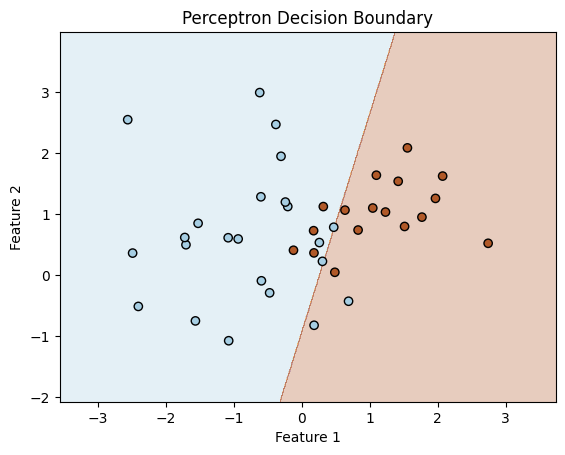

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Optional: Visualize decision boundary for 2D data
import numpy as np

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, pred, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_test, y_test, model)
